<a href="https://colab.research.google.com/github/suddhasourav/learning_nldynamics_chaos_strogatz/blob/main/Exercises_Strogatz_Chapter_7_LImit_Cycles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Example 7.1**

Sketching phase portraits of systems in polar coordinates

**7.1.1** $\dot{r} = r^3 - 4r, \dot{\theta} = 1$

$\dot{\theta} = 1$ indicates a constant angular velocity of 1 $rad\:s^-1$.

We focus on $\dot{r} = r^3 - 4r = r(r+2)(r-2)$.

plotting for $ r \ge 0$ we have $r = 0$ as a stable fixed point and $r = 2$ as an unstable fixed point. This is a limit cycle. If $r$ is exactly equal to $2$, we stay on the the limit cycle. But it is an unstable one; slight deviations either decay to the stable fixed node at $r = 0$, or move away while accelerating (see subplot on the left side).

Plotting in *matplotlib* requires cartesian coordinates, and is the more difficult part of the plotting. the X and Y grid required for the plotting also must be equidistant, thus I had to express $\dot{r}$ and $\dot{\theta}$ in $x$ and $y$. The trick I learned is this:

$x = r \: cos(\theta)$

$⇒ \dot{x} = \dot{r} \: cos(\theta) - r \: \dot{\theta} \: sin(\theta)
= \frac{\dot{r}}{r} x - y \dot{\theta}$

Similarly, $⇒ \dot{y} = \frac{\dot{r}}{r} y + x \dot{\theta}$

If one additionally uses the relation $r^2 = x^2 + y^2$, the system [can be converted to cartesian coordinates](https://math.stackexchange.com/questions/2552951/how-to-transform-polar-dynamical-set-of-equation-to-cartesian):

$\dot{x}  = (x^2+ y^2 - 4) x - y$

$\dot{y}  = (x^2+ y^2 - 4) y + x$

Then we can proceed with the plotting as usual (streamplot on the right subplot).

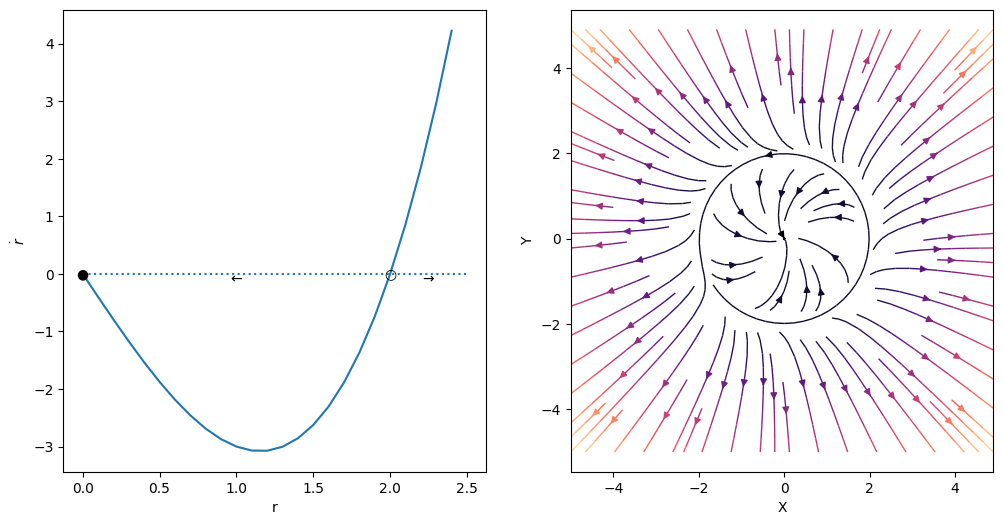

In [ ]:
import scipy as sp
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [12, 6]

plt.subplot(1,2,1)
r = np.arange(0,2.5,0.1)
plt.plot(r, r**3 - 4*r)
plt.hlines(y=0, xmin=0, xmax=2.5, linestyle=':')
plt.text(0, 0, "●", horizontalalignment='center', verticalalignment='center');
plt.text(1, -0.1, "←", horizontalalignment='center', verticalalignment='center');
plt.text(2, 0, "○", horizontalalignment='center', verticalalignment='center');
plt.text(2.25, -0.1, "→", horizontalalignment='center', verticalalignment='center');
plt.xlabel("r"); plt.ylabel("$\dot{r}$");

plt.subplot(1,2,2)

x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)

X, Y = np.meshgrid(x, y)

Ẋ = (X**2 + Y **2 - 4)*X - Y
Ẏ = (X**2 + Y **2 - 4)*Y + X

speed = np.sqrt(Ẋ**2 + Ẏ**2)
speed_normalized = speed/speed.max()

plt.streamplot(X, Y, Ẋ, Ẏ, density=1, linewidth = 1,  color = np.sqrt(speed_normalized),
               cmap = 'magma', broken_streamlines=True)
plt.axis('equal')
plt.xlabel("X");
plt.ylabel("Y");